In [14]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import tensorflow.compat.v1 as tf # tensolflow 1.x 버전을 사용한다.
tf.disable_v2_behavior() # tensorflow 2.x 버전의 문법을 사용하지 않겠다고 선언한다. => 1.x 버전을 사용할 시에 코딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 시각화 그래프
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns

최소 제곱법으로 기울기(가중치)와 y절편(바이어스)을 계산할 데이터를 만든다.

In [19]:
x = [2, 4, 6, 8] # 공부 시간
y = [81, 93, 91, 97] # 시험 점수 => 실제값

공부 시간과 시험 점수 데이터를 판다스 데이터프레임으로 만든다.

In [5]:
df = pd.DataFrame(columns=['x', 'y']) # 빈 데이터프레임을 만든다.
# 빈 데이터프레임에 데이터를 넣을때는 loc[index]를 사용해서 리스트 형태의 데이터를 넣어주면 된다.
df.loc[0] = [2, 81]
df.loc[1] = [4, 93]
df.loc[2] = [6, 91]
df.loc[3] = [8, 97]
df

,x,y
0,2,81
1,4,93
2,6,91
3,8,97


공부 시간에 따른 시험 점수 시각화

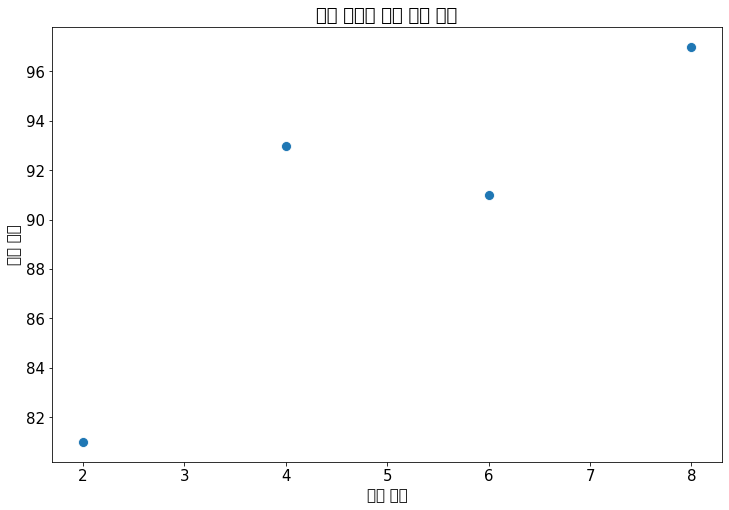

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='x', y='y', s=100)
plt.title('공부 시간에 따른 시험 성적')
plt.xlabel('공부 시간')
plt.ylabel('시험 성적')
plt.show()

기울기 공식 => $\frac{\sum_{i = 0}^{n - 1}(x_i - \bar x)(y_i - \bar y)}{\sum_{i = 0}^{n - 1}(x_i - \bar x)^2}$

In [20]:
mean_x = np.mean(x) # 공부 시간의 평균
mean_y = np.mean(y) # 시험 점수의 평균
print('공부 시간의 평균: {}, 시험 점수의 평균: {}'.format(mean_x, mean_y))

공부 시간의 평균: 5.0, 시험 점수의 평균: 90.5


In [21]:
# 기울기 공식에서 분자를 계산하는 함수
def top(x, mean_x, y, mean_y):
    total = 0.0
    for i in range(len(x)):
        total += (x[i] - mean_x) * (y[i] - mean_y)
    return total

molecule = top(x, mean_x, y, mean_y)
print(molecule)

46.0


In [22]:
# 기울기 공식에서 분모를 계산하는 함수
def bottom(x, mean_x):
    total = 0.0
    for i in range(len(x)):
        total += (x[i] - mean_x) ** 2
    return total

denominator = bottom(x, mean_x)
print(denominator)

20.0


In [24]:
print('기울기 공식의 분자: {}, 기울기 공식의 분모: {}'.format(molecule, denominator))
a = molecule / denominator
print('기울기: {}'.format(a))

기울기 공식의 분자: 46.0, 기울기 공식의 분모: 20.0
기울기: 2.3


y절편 공식 => $\bar y - a \bar x $

In [25]:
b = mean_y - (a * mean_x)
print('y절편: {}'.format(b))

y절편: 79.0
